In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
# Chargement des données
df = pd.read_csv('../data/df_venues_processed.csv', sep=';')

# Conversion de la colonne Date en datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Affichage des premières lignes
print("Premières lignes du dataset:")
print(df.head())
print(f"\nNombre de lignes: {len(df)}")
print(f"\nColonnes: {df.columns.tolist()}")

Premières lignes du dataset:
        Date  GLOBAL  D1   D2   D3  D4  jour_ferie.  pont.conge.  holiday  \
0 2022-09-05     240   0  172   55  13            0            0        0   
1 2022-09-06     542   4  336  169  33            0            0        0   
2 2022-09-07     657   1  399  217  40            0            0        0   
3 2022-09-08     607   2  377  180  48            0            0        0   
4 2022-09-09     461   5  300  120  36            0            0        0   

  jour_semaine  Semaine  Annee Annee_et_Semaine  Temp  pluie  autre  \
0        lundi       36   2022      2022 Sem 36    20    3.1      1   
1        mardi       36   2022      2022 Sem 36    17    0.4      0   
2     mercredi       36   2022      2022 Sem 36    17    0.5      1   
3        jeudi       36   2022      2022 Sem 36    15    0.4      1   
4     vendredi       36   2022      2022 Sem 36    15    0.4      1   

   Greve_nationale  SNCF  prof_nationale  Total_reservations  
0                0

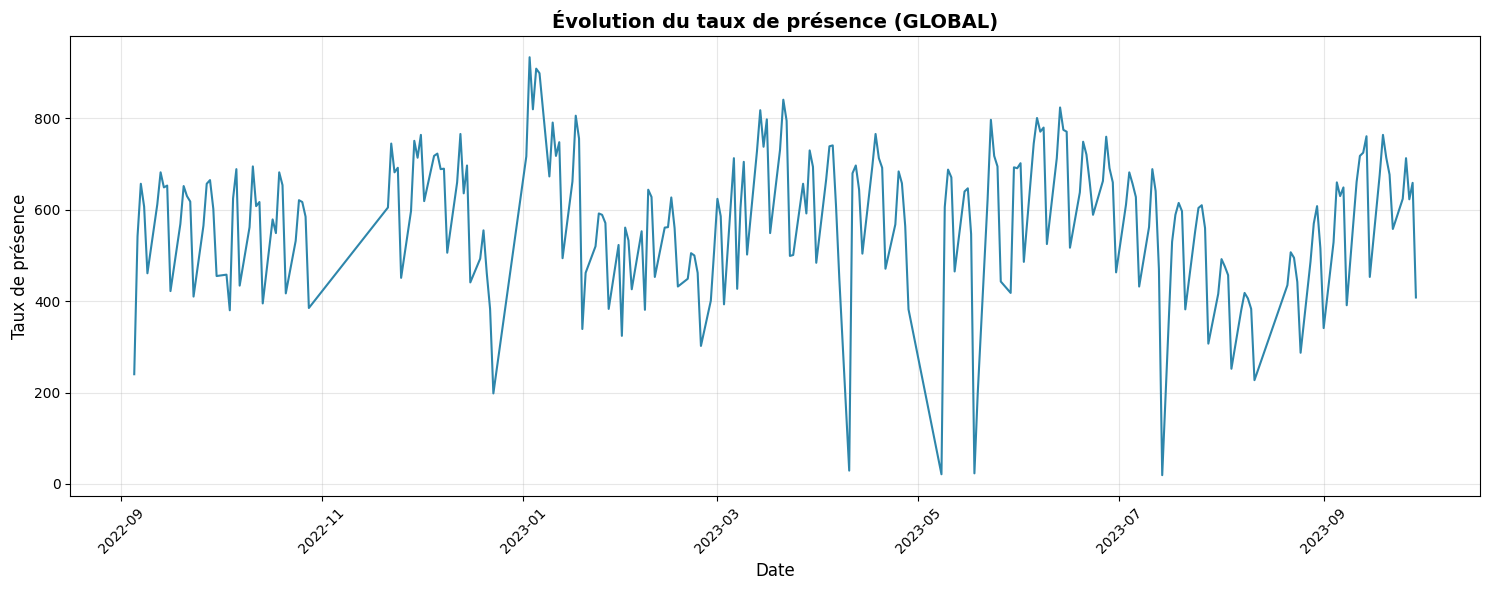

In [72]:
# Visualisation 1: Évolution du taux de présence global au fil du temps
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['GLOBAL'], linewidth=1.5, color='#2E86AB')
plt.title('Évolution du taux de présence (GLOBAL)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Taux de présence', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../img/evolution_presence_global.png', dpi=150, bbox_inches='tight')
plt.show()

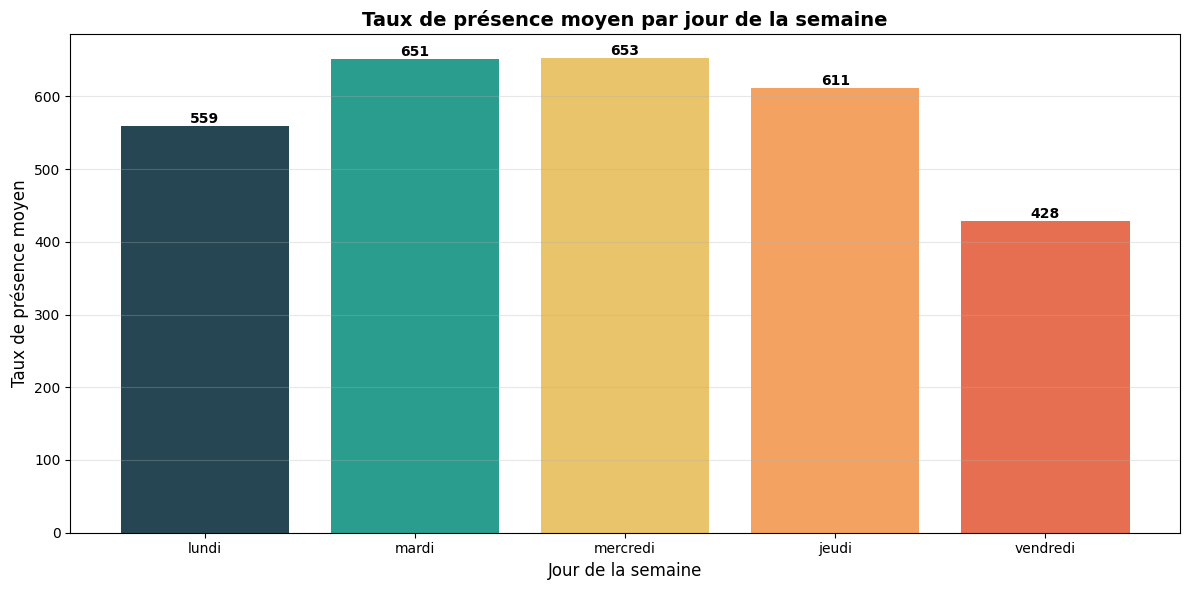

In [73]:
# Visualisation 3: Distribution du taux de présence par jour de la semaine
presence_par_jour = df.groupby('jour_semaine')['GLOBAL'].mean().reindex(
    ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi']
)

plt.figure(figsize=(12, 6))
bars = plt.bar(presence_par_jour.index, presence_par_jour.values, 
               color=['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51'])
plt.title('Taux de présence moyen par jour de la semaine', fontsize=14, fontweight='bold')
plt.xlabel('Jour de la semaine', fontsize=12)
plt.ylabel('Taux de présence moyen', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Ajout des valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../img/presence_par_jour.png', dpi=150, bbox_inches='tight')

plt.show()

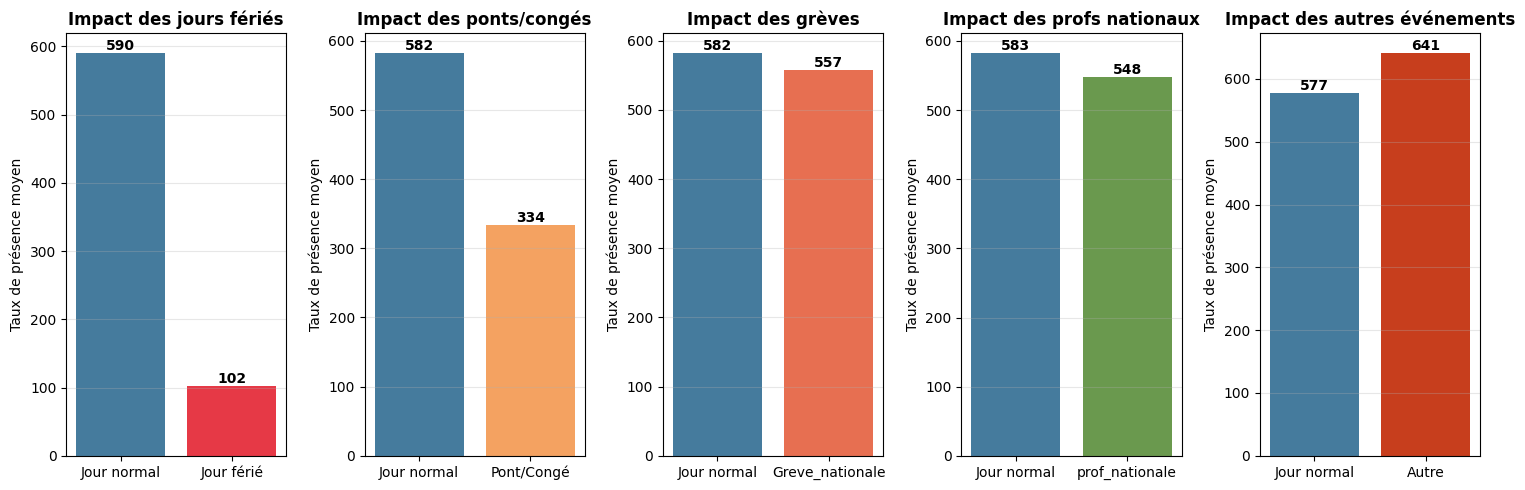

In [74]:
# Visualisation 7: Impact des jours fériés et ponts
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Jours fériés
jour_ferie_stats = df.groupby('jour_ferie.')['GLOBAL'].mean()
axes[0].bar(['Jour normal', 'Jour férié'], jour_ferie_stats.values, 
            color=['#457B9D', '#E63946'])
axes[0].set_title('Impact des jours fériés', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Taux de présence moyen', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Ponts/Congés
pont_stats = df.groupby('pont.conge.')['GLOBAL'].mean()
axes[1].bar(['Jour normal', 'Pont/Congé'], pont_stats.values, 
            color=['#457B9D', '#F4A261'])
axes[1].set_title('Impact des ponts/congés', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Taux de présence moyen', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

# Grèves
greve_stats = df.groupby('Greve_nationale')['GLOBAL'].mean()
axes[2].bar(['Jour normal', 'Greve_nationale'], greve_stats.values, 
            color=['#457B9D', '#E76F51'])
axes[2].set_title('Impact des grèves', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Taux de présence moyen', fontsize=10)
axes[2].grid(True, alpha=0.3, axis='y')

# prof_nationale
prof_stats = df.groupby('prof_nationale')['GLOBAL'].mean()
axes[3].bar(['Jour normal', 'prof_nationale'], prof_stats.values, 
            color=['#457B9D', '#6A994E'])
axes[3].set_title('Impact des profs nationaux', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Taux de présence moyen', fontsize=10)
axes[3].grid(True, alpha=0.3, axis='y')

# Autres
autre_stats = df.groupby('autre')['GLOBAL'].mean()
axes[4].bar(['Jour normal', 'Autre'], autre_stats.values, 
            color=['#457B9D', '#C73E1D'])
axes[4].set_title('Impact des autres événements', fontsize=12, fontweight='bold')
axes[4].set_ylabel('Taux de présence moyen', fontsize=10)
axes[4].grid(True, alpha=0.3, axis='y')

# Ajout des valeurs
for ax in axes:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/5q/7s32gsxn5gl7_m0wm2js8xdc0000gn/T/ipykernel_94726/483865414.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[c] for c in cols_box], labels=labels_box, patch_artist=True)


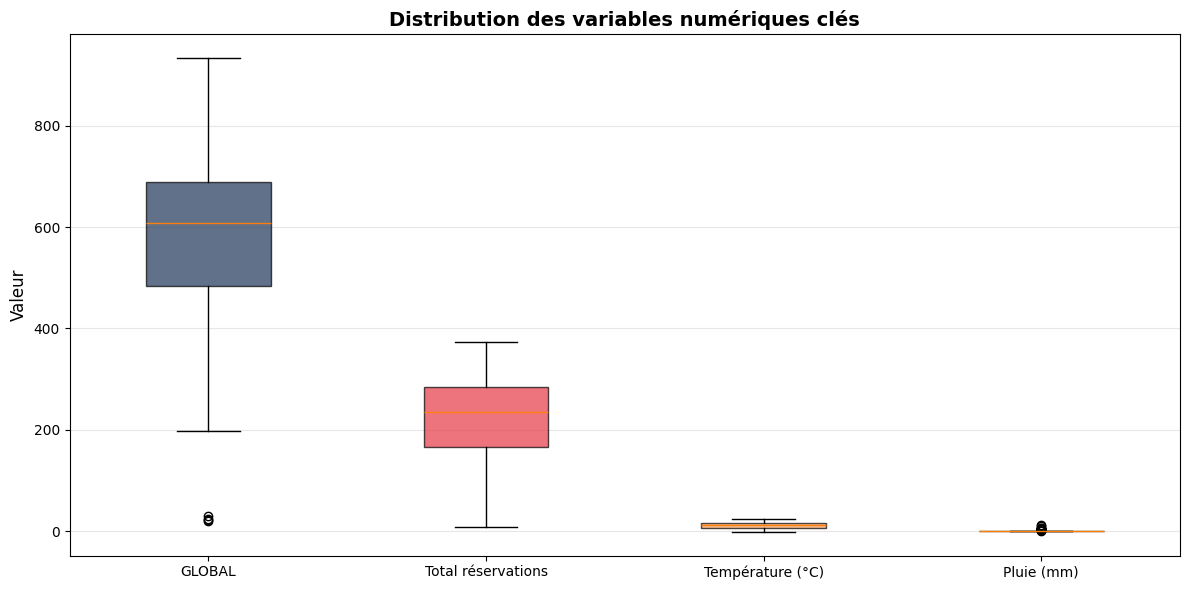


Statistiques descriptives:
       GLOBAL  Total_reservations   Temp  pluie
count   250.0               250.0  250.0  250.0
mean    580.5               223.1   10.7    0.5
std     154.0                76.6    5.7    1.4
min      19.0                 9.0   -2.0    0.0
25%     484.5               166.2    6.2    0.0
50%     608.0               236.0   11.0    0.0
75%     689.8               284.8   16.0    0.4
max     934.0               374.0   23.0   12.9


In [75]:
# Visualisation 8: Distribution des variables numériques clés
cols_box  = ['GLOBAL', 'Total_reservations', 'Temp', 'pluie']
labels_box = ['GLOBAL', 'Total réservations', 'Température (°C)', 'Pluie (mm)']
colors_box = ['#1D3557', '#E63946', '#F4A261', '#457B9D']

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot([df[c] for c in cols_box], labels=labels_box, patch_artist=True)

for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Distribution des variables numériques clés', fontsize=14, fontweight='bold')
ax.set_ylabel('Valeur', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nStatistiques descriptives:")
print(df[cols_box].describe().round(1))

## 9 — Matrice de corrélation

Corrélations de Pearson entre toutes les variables numériques.  
- **Proche de +1** : corrélation positive forte  
- **Proche de -1** : corrélation négative forte  
- **Proche de 0** : pas de relation linéaire

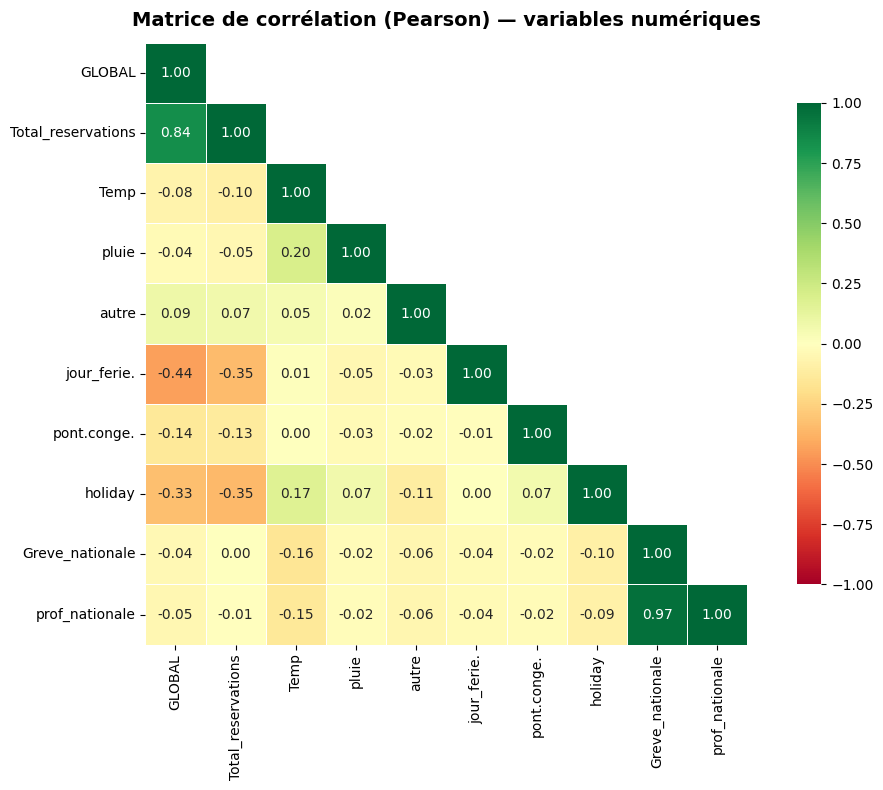

In [76]:
import seaborn as sns

num_cols = ['GLOBAL', 'Total_reservations',
            'Temp', 'pluie', 'autre',
            'jour_ferie.', 'pont.conge.', 'holiday',
            'Greve_nationale', 'prof_nationale']

corr = df[num_cols].corr()

fig, ax = plt.subplots(figsize=(11, 8))
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(
    corr, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn',
    center=0, vmin=-1, vmax=1,
    square=True, linewidths=0.5, cbar_kws={'shrink': 0.8},
    ax=ax
)
ax.set_title('Matrice de corrélation (Pearson) — variables numériques',
             fontsize=14, fontweight='bold', pad=12)
plt.tight_layout()
plt.savefig('../img/corr_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## 10 — Courbes de corrélation (GLOBAL vs features clés)

Scatter plots avec droite de régression et coefficient de corrélation r.

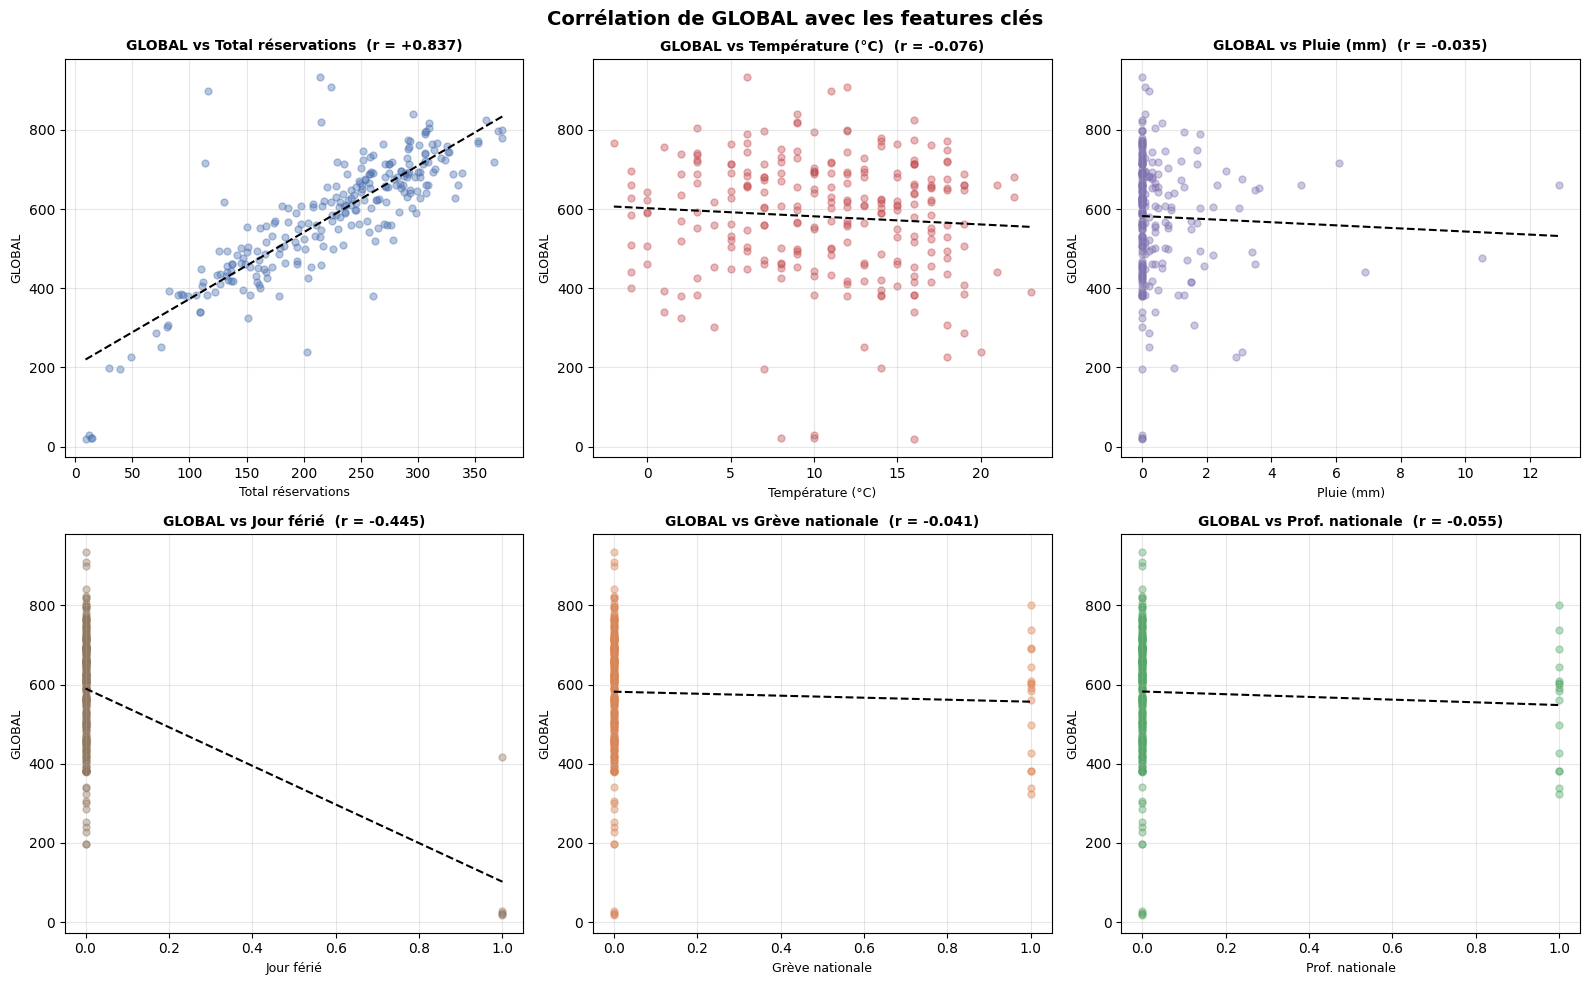

In [77]:
features_vs_global = [
    ('Total_reservations', 'Total réservations', '#4C72B0'),
    ('Temp',               'Température (°C)',   '#C44E52'),
    ('pluie',              'Pluie (mm)',          '#8172B2'),
    ('jour_ferie.',        'Jour férié',          '#937860'),
    ('Greve_nationale',    'Grève nationale',     '#DD8452'),
    ('prof_nationale',     'Prof. nationale',     '#55A868'),
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Corrélation de GLOBAL avec les features clés',
             fontsize=14, fontweight='bold')

for ax, (feat, label, color) in zip(axes.flat, features_vs_global):
    x, y = df[feat], df['GLOBAL']

    ax.scatter(x, y, alpha=0.4, s=25, color=color)

    z  = np.polyfit(x, y, 1)
    xr = np.linspace(x.min(), x.max(), 200)
    ax.plot(xr, np.poly1d(z)(xr), color='black', lw=1.5, ls='--')

    r = np.corrcoef(x, y)[0, 1]
    ax.set_title(f'GLOBAL vs {label}  (r = {r:+.3f})', fontsize=10, fontweight='bold')
    ax.set_xlabel(label, fontsize=9)
    ax.set_ylabel('GLOBAL', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../img/corr_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

## 11 — Autocorrélation (ACF) et Autocorrélation partielle (PACF)

- **ACF** : corrélation de la série avec elle-même à différents décalages (lags). Révèle la mémoire de la série.  
- **PACF** : corrélation directe à chaque lag (en retirant l'effet des lags intermédiaires). Aide à choisir l'ordre `p` d'un modèle AR.

> La zone bleue représente l'intervalle de confiance à 95% : les barres à l'extérieur sont significativement non nulles.

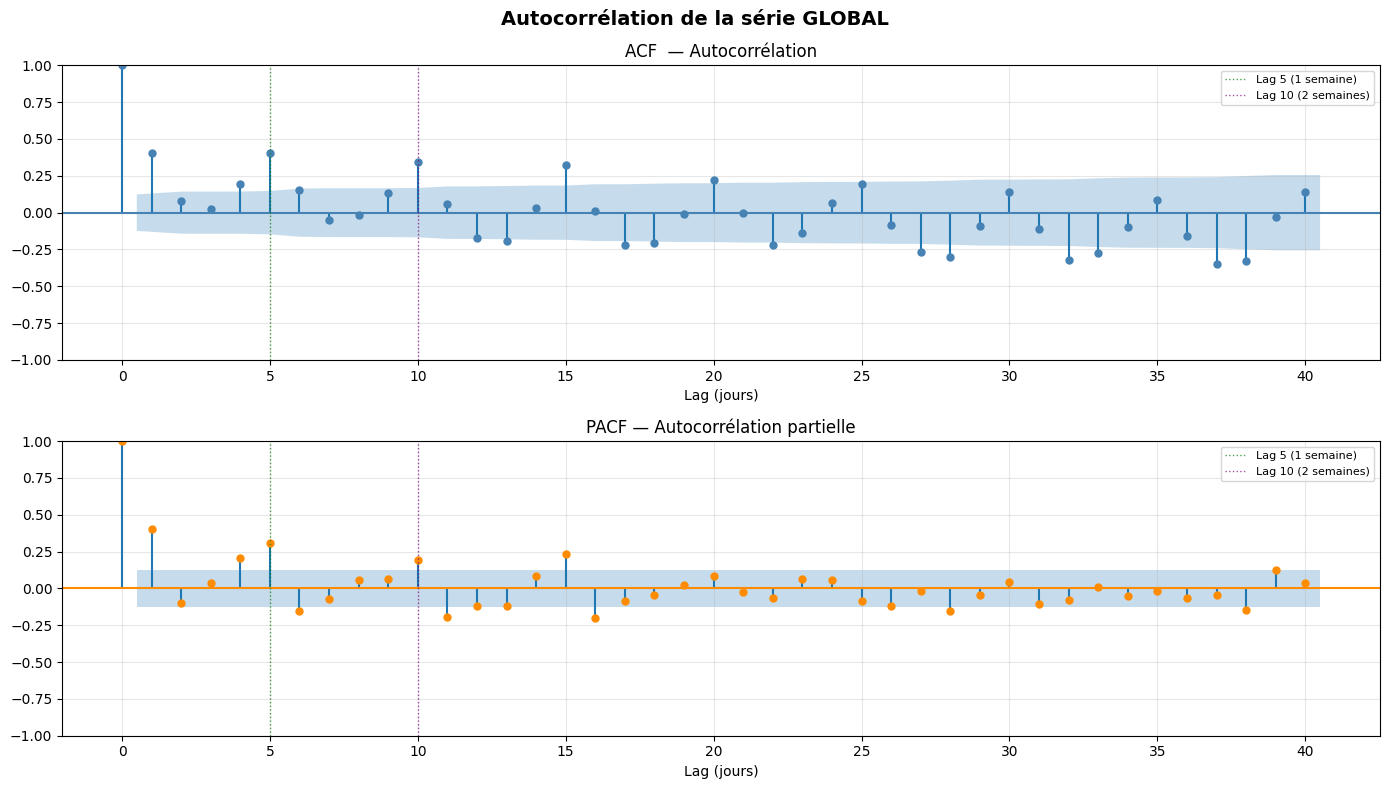

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = df['GLOBAL'].values
n_lags = 40

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Autocorrélation de la série GLOBAL', fontsize=14, fontweight='bold')

plot_acf(series,  lags=n_lags, ax=axes[0], color='steelblue',  title='ACF  — Autocorrélation')
plot_pacf(series, lags=n_lags, ax=axes[1], color='darkorange', title='PACF — Autocorrélation partielle',
          method='ywm')

# Annotations
for ax in axes:
    ax.axvline(5,  color='green',  ls=':', lw=1, alpha=0.7, label='Lag 5 (1 semaine)')
    ax.axvline(10, color='purple', ls=':', lw=1, alpha=0.7, label='Lag 10 (2 semaines)')
    ax.legend(fontsize=8)
    ax.set_xlabel('Lag (jours)', fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../img/acf_pacf.png', dpi=150, bbox_inches='tight')
plt.show()

## 12 — Distributions (histogrammes + KDE)

Distribution empirique de GLOBAL et Total_reservations avec la courbe de densité.

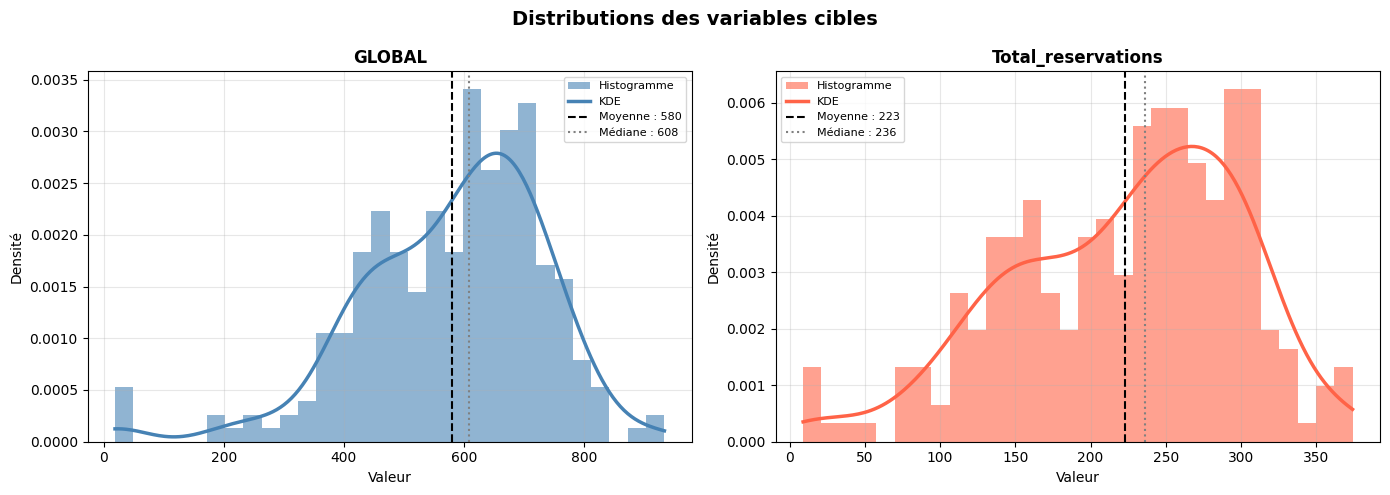

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distributions des variables cibles', fontsize=14, fontweight='bold')

for ax, col, color in zip(axes, ['GLOBAL', 'Total_reservations'], ['steelblue', 'tomato']):
    data = df[col]
    ax.hist(data, bins=30, color=color, alpha=0.6, density=True, label='Histogramme')

    # KDE manuel
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    xr  = np.linspace(data.min(), data.max(), 300)
    ax.plot(xr, kde(xr), color=color, lw=2.5, label='KDE')

    # Lignes statistiques
    ax.axvline(data.mean(),   color='black',  ls='--', lw=1.5, label=f'Moyenne : {data.mean():.0f}')
    ax.axvline(data.median(), color='grey',   ls=':',  lw=1.5, label=f'Médiane : {data.median():.0f}')

    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('Valeur', fontsize=10)
    ax.set_ylabel('Densité', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../img/distributions.png', dpi=150, bbox_inches='tight')
plt.show()

## 13 — Heatmap calendaire (semaine × jour)

Vue calendaire des valeurs GLOBAL : chaque colonne = une semaine, chaque ligne = un jour.  
Permet de repérer visuellement les semaines atypiques (vacances, grèves, fériés).

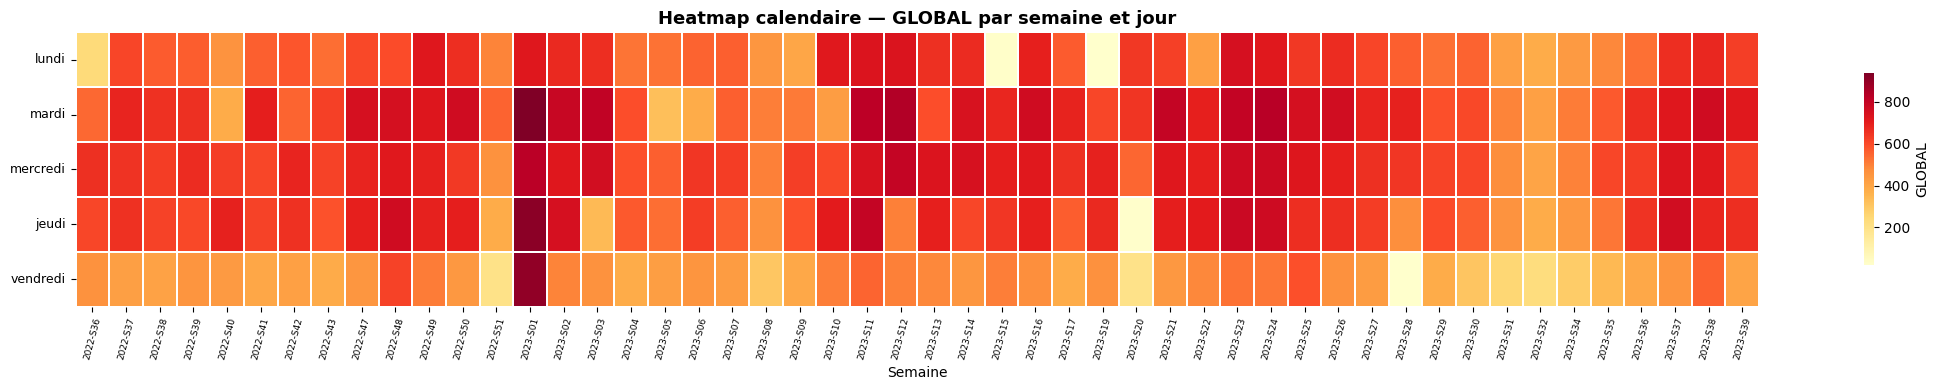

In [80]:
jour_ordre = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi']

# Clé unique par semaine pour l'axe x
df['sem_key'] = df['Annee'].astype(str) + '-S' + df['Semaine'].astype(str).str.zfill(2)
pivot = df.pivot_table(values='GLOBAL', index='jour_semaine', columns='sem_key', aggfunc='mean')
pivot = pivot.reindex(jour_ordre)

fig, ax = plt.subplots(figsize=(22, 4))
sns.heatmap(
    pivot, cmap='YlOrRd', ax=ax,
    linewidths=0.3, linecolor='white',
    cbar_kws={'label': 'GLOBAL', 'shrink': 0.7},
    annot=False
)
ax.set_title('Heatmap calendaire — GLOBAL par semaine et jour',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Semaine', fontsize=10)
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontsize=6.5)
ax.set_yticklabels(jour_ordre, rotation=0, fontsize=9)
plt.tight_layout()
plt.savefig('../img/heatmap_calendaire.png', dpi=150, bbox_inches='tight')
plt.show()